# Find wheels in images ##

Develop techniques for finding wheels (connected regions) in images.

## Read image from file 

In [1]:
import datetime
now = datetime.datetime.now()
startNB = now
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
#
imDirControl = "CometImages/exp-train"
imDirIrrad = "CometImages/exp-train/"
# Control batch file numbers from  0001 to 0020
# Irradiated batch file numbers from 0001 to 0020
imNum = "comets43.bmp"
#imNum = "comets54.bmp"
#imFile = imDirControl + imNum
imFile = imDirIrrad + imNum
#
# Evidence tuning needed in e.g. Control 0009, Control 0019, Irradiated 0013, Irradiated 0018
#
# Read in image
imgRaw = plt.imread(imFile)
#
print(" ")
print("File " + imFile + " read.")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-05 13:25:24.152663
 
File CometImages/exp-train/comets43.bmp read.
 
Date and time 2021-05-05 13:25:24.660499
Time since last check is 0:00:00.507836


## Some usful routines

Convert RGBA images to RGB and RGB to greyscale. Ceiling division.

In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image.
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB (and flag indicating negative required), output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
def ceilDiv(a, b):
    '''
    Return a//b rounded up.
    '''
    ceiling = -(-a//b)
    return ceiling
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-05 13:25:26.562148
 
Date and time 2021-05-05 13:25:26.562687
Time since last check is 0:00:00.000539


## Initial image processing

Open image, convert to grey scale and apply thresholds.

Date and time  2021-05-05 13:25:27.610722
Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 520 of columns 696 of pixels 361920 and depth 4
Maximum value in pixels 244
 
Number of thresholds 2
Number of rows in figure 2
 


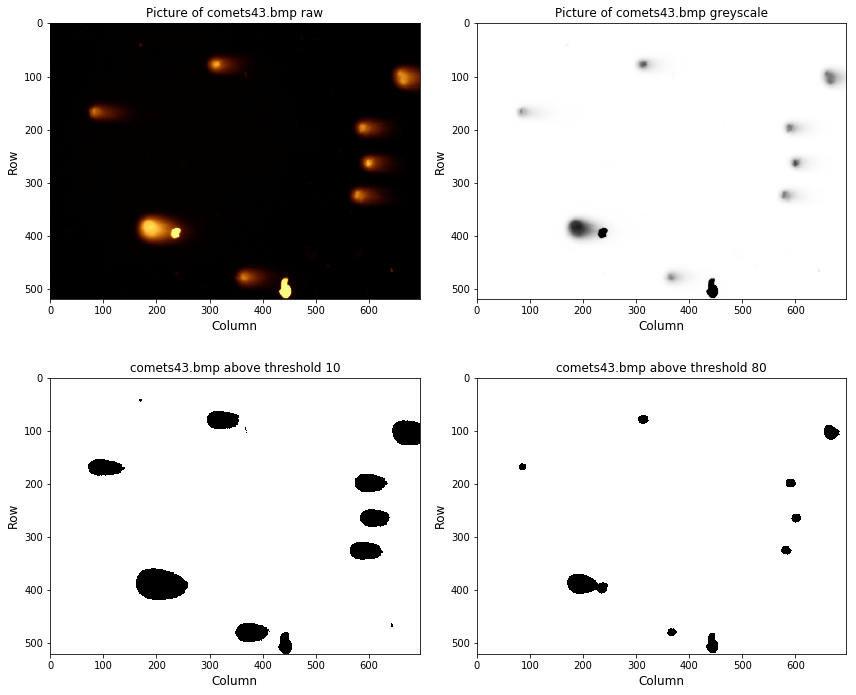

 
Date and time 2021-05-05 13:25:28.345977
Time since last check is 0:00:00.735255


In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
def processImage(imgRaw):
    #
    import sys
    import numpy as np
    import scipy.ndimage as scimg
    import matplotlib.pyplot as plt
    %matplotlib inline
    # 
    # Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
    nRows = imgRaw.shape[0] 
    nCols = imgRaw.shape[1]
    nDepth = imgRaw.shape[2]
    #
    nThresh = len(thresh)
    img = np.zeros((nRows, nCols))
    imgThr = np.zeros((nRows, nCols, nThresh))
    #
    # Determine image format and process accordingly
    if nDepth == 4:
        imgRGB = rgba2rgb(imgRaw)
        imgGrey = rgb2grey(imgRGB, 1)
    elif nDepth == 3:
        imgRGB = imgRaw
        imgGrey = rgb2grey(imgRGB, 0)
    elif nDepth == 1:
        imgRGB = imgRaw
        imgGrey = imgRaw
    else:
        print(" ")
        print("Unexpected image depth",nDepth)
        sys.stop()
    #
    print("Type of raw image file is",imgRaw.dtype)
    print("Type of greyscale image file is",imgGrey.dtype)
    print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
    print("Maximum value in pixels",np.amax(imgGrey))
    #
    return imgGrey, nRows, nCols
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([10, 80])  #originally [30, 180] 
#
imgGrey, nRows, nCols = processImage(imgRaw)
#
nThresh = len(thresh)
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Plot image at various stages of processing
nFigRows = 1 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*6, 10))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imNum + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imNum + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 3 + nT)
    plt.title(imNum + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Identify clusters using watershed algorithm

Identify "clusters" at the lowest threshold and "heads" at the higher threshold.

Date and time 2021-05-05 13:25:29.230845
 
Cluster ID using Watershed algorithm
Cluster threshold 10, head threshold 80.
Min number of pixels in cluster 200, max number 200000.
Min number of pixels in head 40, max number 20000.
 


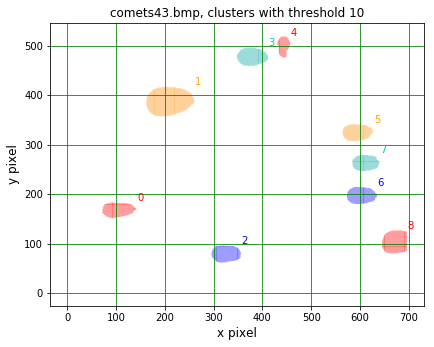

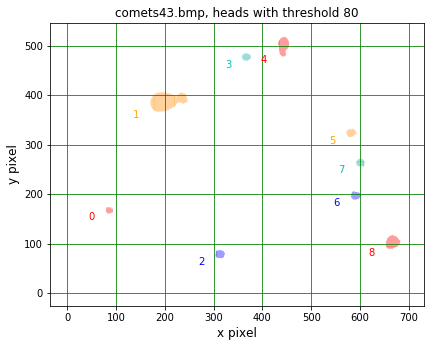

 
Date and time 2021-05-05 13:25:30.267099
Time since last check is 0:00:01.036254


In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
#
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#
debug = False
#
# Requirements on minimum and maximum number of pixels in wheels at the cluster and head thresholds
minClusPixels = 200
maxClusPixels = 200000
minHeadPixels = 40
maxHeadPixels = 20000
#
print(" ")
print("Cluster ID using Watershed algorithm")
print("Cluster threshold",thresh[0],"\b, head threshold",thresh[1],"\b.")
print("Min number of pixels in cluster",minClusPixels,"\b, max number",maxClusPixels,"\b.")
print("Min number of pixels in head",minHeadPixels,"\b, max number",maxHeadPixels,"\b.")
#
# Define grid of markers and background marker value:
nStepCols = 3
nStepRows = 3
rMark, cMark = np.ogrid[0:nRows:nStepRows, 0:nCols:nStepCols]
if debug:
    print(" ")
    print("rMark.shape",rMark.shape,"cMark.shape",cMark.shape)
mStart = 1
markers = np.zeros((nRows, nCols)).astype(np.int)
markers[rMark, cMark] = rMark/nStepRows + cMark*nRows/(nStepRows*nStepCols) + mStart
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(markers, cmap = "CMRmap");
#
# Create image with cluster threshold and run watershed algorithm
clusImg = imgGrey > thresh[0]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(clusImg);
colDotsClus = ndimage.watershed_ift(clusImg.astype(np.uint8), markers)
#
# Remove "isolated" markers (i.e. markers in regions where no cluster found)
boolrMark = rMark + 1 < nRows
colDotsClus[rMark*boolrMark, cMark] = colDotsClus[(rMark + 1)*boolrMark, cMark]
#
# Find the value of the marker of the last identified regions
mMaxClus = np.amax(colDotsClus)
#
# Positions of marker values
boolClus = colDotsClus >= mStart
nFoundClus = len(np.unique(colDotsClus[boolClus]))
rMarkerClus = np.zeros(nFoundClus)
rMarkerClus = np.unique(colDotsClus[boolClus])
#
# Select the clusters, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nClus = 0
cMarkerClus = np.zeros(nFoundClus)
maxInDotClus = 0
for nR in range(0, nFoundClus):
    boolClus = colDotsClus == rMarkerClus[nR]
    nHereCl = np.sum(boolClus)
    if nHereCl < minClusPixels or nHereCl > maxClusPixels:
        continue
    maxInDotClus = max(maxInDotClus, nHereCl)
    cMarkerClus[nClus] = rMarkerClus[nR]
    nClus += 1
#
# Create image with head threshold and run watershed algorithm
headImg = imgGrey > thresh[1]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(headImg);
colDotsHead = ndimage.watershed_ift(headImg.astype(np.uint8), markers)
#
# Remove "isolated" markers
boolrMark = rMark + 1 < nRows
colDotsHead[rMark*boolrMark, cMark] = colDotsHead[(rMark + 1)*boolrMark, cMark]
#colDotsHead[rMark, cMark] = colDotsHead[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions.
mMaxHead = np.amax(colDotsHead)
#
# Positions of marker values that are not background
boolHead = colDotsHead > mStart
nFoundHead = len(np.unique(colDotsHead[boolHead]))
rMarkerHead = np.zeros(nFoundHead)
rMarkerHead = np.unique(colDotsHead[boolHead])
#
# Select the heads, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nHead = 0
cMarkerHead = np.zeros(nFoundHead)
maxInDotHead = 0
for nR in range(0, nFoundHead):
    boolHead = colDotsHead == rMarkerHead[nR]
    nHereHd = np.sum(boolHead)
    if nHereHd < minHeadPixels or nHereHd > maxHeadPixels:
        continue
    maxInDotHead = max(maxInDotHead, nHereHd) 
    cMarkerHead[nHead] = rMarkerHead[nR]
    nHead += 1
#
# Colour table for plots
nColTab = 4
colorTab = ['r', 'orange', 'b', 'c']
#
# Information on clusters
nInCluster = np.zeros(nClus).astype(int)
iClusSum = np.zeros(nClus)
#
# Information on pixels in clusters
lClus = np.sum(clusImg)
#
# Safe size of arrays would be number of pixels in image. Try to reduce size by using number of pixels in clusters
# The factor lFact can be used to expand array sizes
lFact = 4
indexCl = np.zeros(lFact*lClus)
cPixelsCl = np.zeros(lFact*lClus).astype(int)
rPixelsCl = np.zeros(lFact*lClus).astype(int)
iPixelsCl = np.zeros(lFact*lClus)
#
# Information on head
nInHead = np.zeros(nHead).astype(int)
iHeadSum = np.zeros(nHead)
#
# Information on pixels in head (lHead must be large enough...here probably larger than usually needed)
lHead = lClus
indexHd = np.zeros(lHead)
cPixelsHd = np.zeros(lHead).astype(int)
rPixelsHd = np.zeros(lHead).astype(int)
iPixelsHd = np.zeros(lHead)
#
# Temporary information 
cPixelsHere = np.zeros(lClus).astype(int)
rPixelsHere = np.zeros(lClus).astype(int)
iPixelsHere = np.zeros(lClus)
thisPic = np.zeros((nRows, nCols))
#
# Find pixels in clusters, determine positions and plot 
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imNum + ", clusters with threshold " + str(thresh[0]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMax = 2
yOffMax = 2
mSize = 0.001
#
nCol = 0
nLastCl = 0
for nC in range(0, nClus):
    #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
# Find pixels in head, determine positions and plot
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imNum + ", heads with threshold " + str(thresh[1]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Make plots using stored cluster and head data

Date and time 2021-05-05 13:25:33.630146
 


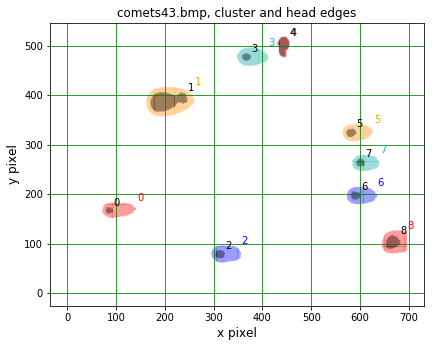

 
Date and time 2021-05-05 13:25:33.931037
Time since last check is 0:00:00.300891


In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imNum + ", cluster and head edges", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
nCol = 0
#
nLastCl = 0
nLastClEd = 0
for nC in range(0, nClus):
    #
    # Clusters
    nHereCl = nInCluster[nC]
    plt.scatter(cPixelsCl[nLastCl:nLastCl + nHereCl], rPixelsCl[nLastCl:nLastCl + nHereCl], 
                s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl]) + yOffMax
    cLab = np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    #
    # Heads
    nHereHd = nInHead[nH]
    plt.scatter(cPixelsHd[nLastHd:nLastHd + nHereHd], rPixelsHd[nLastHd:nLastHd + nHereHd], 
                s = mSize, c = 'k', marker = 'o')
    rLab = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]) + yOffMax
    cLab = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]) + xOffMax
    plt.text(cLab, rLab, str(nH), color = 'k')
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Select clusters by combining results from all thresholds

Select only low threshold clusters/edges (called wheels/rims in following) containing one high threshold cluster/edge (wheel/rim).

Produce and sort lists of coordinates that will be put into json file as "polygons". Sort according to the angles of the points about the centre of the rim. Choose the centre to be the mean position of the high threshold rim enclosed by the low threshold rim, or the mean position of the pixels in the low threshold rim.

Note that we need to add the first point to the end of the sorted list to close the polygon!

Date and time  2021-05-05 13:25:37.372687
 
Image size 520 x 696
Fiducial region, rows 5 to 515 , columns 5 to 691
Min number of points in wheel 500
Wheel size, row width 20 to 200 , column width 50 to 500
 


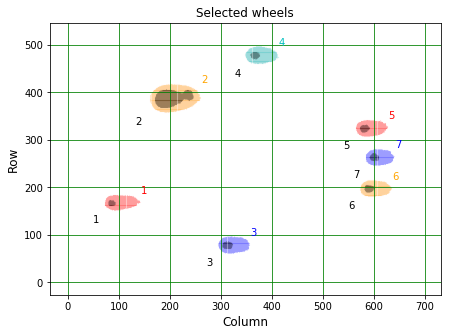

 
Date and time 2021-05-05 13:25:37.630069
Time since last check is 0:00:00.257382


In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
debug = False
#
withLabels = True
#
# Choose low threshold or high threshold wheel as centre in sorting procedure
centreLT = True
#
minWheelPnts0 = 500
rMin0 = 5
rMax0 = nRows - rMin0
cMin0 = 5
cMax0 = nCols - cMin0
rWidMin0 = 20
rWidMax0 = 200
cWidMin0 = 50
cWidMax0 = 500
print(" ")
print("Image size",nRows,"x",nCols)
print("Fiducial region, rows",rMin0,"to",rMax0,"\b, columns",cMin0,"to",cMax0)
print("Min number of points in wheel",minWheelPnts0)
print("Wheel size, row width",rWidMin0,"to",rWidMax0,"\b, column width",cWidMin0,"to",cWidMax0)
#
pnts_num = np.zeros(nClus).astype(int)
pnts_row = np.zeros((nClus, np.amax(nInCluster))).astype(int)
pnts_col = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num = np.zeros(nHead).astype(int)
head_row = np.zeros((nClus, np.amax(nInHead))).astype(int)
head_col = np.zeros((nClus, np.amax(nInHead))).astype(int)
#
# Text positions
wTextRow = 2
wTextCol = 2
hTextRow = 28
hTextCol = 28
#
fig = plt.figure(figsize=(7, 5))
plt.title("Selected wheels", fontsize = 12)
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
#
iSelWheel = 0
nLastCl = 0
cometNum = 0
for nC in range(0, nClus):
    #
    # Clusters
    nHereCl = nInCluster[nC]
    rMinCl = np.amin(rPixelsCl[nLastCl:nLastCl + nHereCl])
    cMinCl = np.amin(cPixelsCl[nLastCl:nLastCl + nHereCl])
    rMaxCl = np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl])
    cMaxCl = np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl])
    rWidCl = rMaxCl - rMinCl
    cWidCl = cMaxCl - cMinCl
    #
    if (nHereCl > minWheelPnts0 and
        rMinCl > rMin0 and rMaxCl < rMax0 and cMinCl > cMin0 and cMaxCl < cMax0 and  
        rWidCl > rWidMin0 and rWidCl < rWidMax0 and cWidCl > cWidMin0 and cWidCl < cWidMax0):
        #
        nHeadsInClus = 0
        #
        nLastHd = 0
        for nH in range(0, nHead):
            #
            # Clusters
            nHereHd = nInHead[nH]
            rMinHd = np.amin(rPixelsHd[nLastHd:nLastHd + nHereHd])
            cMinHd = np.amin(cPixelsHd[nLastHd:nLastHd + nHereHd])
            rMaxHd = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd])
            cMaxHd = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd])
            rWidHd = rMaxHd - rMinHd
            cWidHd = cMaxHd - cMinHd
            #
            # Find any high threshold rims completely within the low threshold rim
            if (rMinHd > rMinCl and rMaxHd < rMaxCl and 
                cMinHd > cMinCl and cMaxHd < cMaxCl):
                #
                nHeadsInClus += 1
                nLastHdSel = nLastHd
                nHereHdSel = nHereHd
                nHeadSel = nH
            #
            nLastHd = nLastHd + nHereHd
        #
        # End of loop over heads
        #
        if nHeadsInClus == 1:
            #
            cometNum +=1
            # This wheel accepted
            pnts_num[iSelWheel] = nHereCl
            pnts_row[iSelWheel, 0:nHereCl] = rPixelsCl[nLastCl:nLastCl + nHereCl].astype(int)
            pnts_col[iSelWheel, 0:nHereCl] = cPixelsCl[nLastCl:nLastCl + nHereCl].astype(int)
            head_num[iSelWheel] = nHereHdSel
            head_row[iSelWheel, 0:nHereHdSel] = rPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel].astype(int)
            head_col[iSelWheel, 0:nHereHdSel] = cPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel].astype(int)
            #
            plt.scatter(pnts_col[iSelWheel, 0:pnts_num[iSelWheel]], pnts_row[iSelWheel, 0:pnts_num[iSelWheel]],
                        s = 0.001, color = colorTab[nCol])
            plt.scatter(head_col[iSelWheel, 0:head_num[iSelWheel]], head_row[iSelWheel, 0:head_num[iSelWheel]],
                        s = 0.001, color = 'k')

            if withLabels:
                #
                # Wheel number
                row_label = np.amax(pnts_row[iSelWheel, 0:pnts_num[iSelWheel]]) + wTextRow
                col_label = np.amax(pnts_col[iSelWheel, 0:pnts_num[iSelWheel]]) + wTextCol
                plt.text(col_label, row_label, str(cometNum), color = colorTab[nCol]) #label was nC
                #
                # Head nunber
                row_label = np.amin(pnts_row[iSelWheel, 0:head_num[iSelWheel]]) - hTextRow
                col_label = np.amin(pnts_col[iSelWheel, 0:head_num[iSelWheel]]) - hTextCol
                plt.text(col_label, row_label, str(cometNum), color = 'k') #labal was nHeadSel
                #
            nCol = nCol + 1
            if nCol > nColTab - 1:
                 nCol = 0
            #
            iSelWheel += 1
        #
        # End of if statement, rim accepted
    #
    # End of if statement, cluster in fiducial region 
    nLastCl = nLastCl + nHereCl
#
# End of loop over clusters
nWheels = iSelWheel
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Make plots of selected comets

Date and time  2021-05-05 13:25:40.219387
 
Number of wheels 7
 


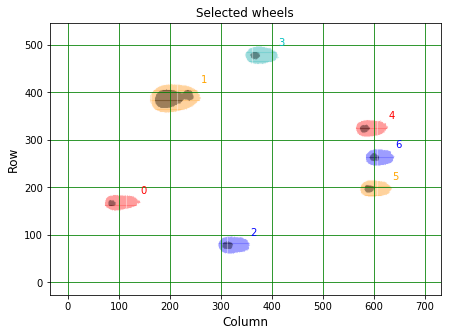

 
Date and time 2021-05-05 13:25:40.474169
Time since last check is 0:00:00.254782


In [7]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
debug = False
#
withLabels = True
#
print(" ")
print("Number of wheels",nWheels)
#
# Text positions
wTextRow = 2
wTextCol = 2
hTextRow = 28
hTextCol = 28
#
fig = plt.figure(figsize=(7, 5))
plt.title("Selected wheels", fontsize = 12)
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
#
nCol = 0
for nW in range(0, nWheels):
    #
    # Wheels
    plt.scatter(pnts_col[nW, 0:pnts_num[nW]], pnts_row[nW, 0:pnts_num[nW]], s = 0.001, color = colorTab[nCol])
    #
    # Heads
    plt.scatter(head_col[nW, 0:head_num[nW]], head_row[nW, 0:head_num[nW]:], s = 0.001, color = 'k')
    #
    if withLabels:
        row_label = np.amax(pnts_row[nW, 0:pnts_num[nW]]) + wTextRow
        col_label = np.amax(pnts_col[nW, 0:pnts_num[nW]]) + wTextCol
        plt.text(col_label, row_label, str(nW), color = colorTab[nCol])
    #
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Extract intensities

Date and time  2021-05-05 13:25:43.142724
 
Number of wheels 7
 


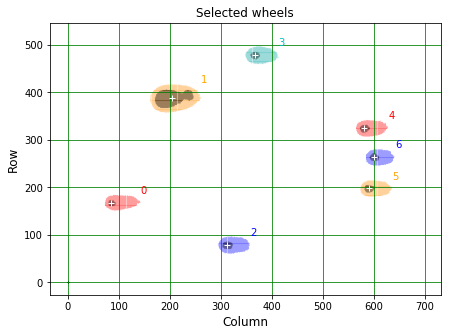

 
Date and time 2021-05-05 13:25:43.437369
Time since last check is 0:00:00.294645


In [8]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
#
debug = False
#
withLabels = True
#
print(" ")
print("Number of wheels",nWheels)
#
sumWheel = np.zeros(nWheels)
sumHead = np.zeros(nWheels)
#
avgHeadRow = np.zeros(nWheels)
avgHeadCol = np.zeros(nWheels)
#
# Text positions
wTextRow = 2
wTextCol = 2
hTextRow = 28
hTextCol = 28
#
fig = plt.figure(figsize=(7, 5))
plt.title("Selected wheels", fontsize = 12)
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
#
nCol = 0
for nW in range(0, nWheels):
    #
    # Wheels
    sumWheel[nW] = np.sum(imgGrey[pnts_row[nW, 0:pnts_num[nW]], pnts_col[nW, 0:pnts_num[nW]]])
    #
    # Heads
    sumHead[nW] = np.sum(imgGrey[head_row[nW, 0:head_num[nW]], head_col[nW, 0:head_num[nW]]])
    avgHeadRow[nW] = (np.sum(imgGrey[head_row[nW, 0:head_num[nW]], head_col[nW, 0:head_num[nW]]]*head_row[nW, 0:head_num[nW]])/
                      sumHead[nW])
    avgHeadCol[nW] = (np.sum(imgGrey[head_row[nW, 0:head_num[nW]], head_col[nW, 0:head_num[nW]]]*head_col[nW, 0:head_num[nW]])/
                      sumHead[nW])
    #
    # Wheels
    plt.scatter(pnts_col[nW, 0:pnts_num[nW]], pnts_row[nW, 0:pnts_num[nW]], s = 0.001, color = colorTab[nCol])
    #
    # Heads
    plt.scatter(head_col[nW, 0:pnts_num[nW]], head_row[nW, 0:pnts_num[nW]], s = 0.001, color = 'k')
    #
    if withLabels:
        row_label = np.amax(pnts_row[nW, 0:pnts_num[nW]]) + wTextRow
        col_label = np.amax(pnts_col[nW, 0:pnts_num[nW]]) + wTextCol
        plt.text(col_label, row_label, str(nW), color = colorTab[nCol])
    #
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
#
if debug:
    print(" ")
    print("sumWheel \n",sumWheel)
    print("sumHead \n",sumHead)
    print("avgHeadRow \n",avgHeadRow)
    print("avgHeadCol \n",avgHeadCol)
plt.plot(avgHeadCol, avgHeadRow, marker = '+', linestyle = '', color = 'w')
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Quadrant wheel, head and tail intensities

Date and time  2021-05-05 13:25:51.397822
 
Number of wheels 7
 
Left-right asymmetry tail
 [-0.61918476 -0.15984154 -0.45800618 -0.44522035 -0.5140643  -0.51151467
 -0.45766515]
Mean left-right asymmetry -0.45221384925049535
 
Up-down asymmetry tail
 [-0.20296854 -0.10375353 -0.19966917 -0.20221818 -0.20571157 -0.25402465
 -0.25477398]
Mean up-down asymmetry 0.04560824108659537
 
Left-right asymmetry head
 [-0.00861517  0.15176792  0.03617964  0.09398222  0.03986486  0.04022946
  0.00739088]
Mean left-right asymmetry 0.0515428303985147
Up-down asymmetry head
 [ 0.03595586  0.03091672 -0.06049339  0.03433872  0.05015015 -0.03352455
 -0.02321852]
Mean up-down asymmetry 0.004875000165789082
 


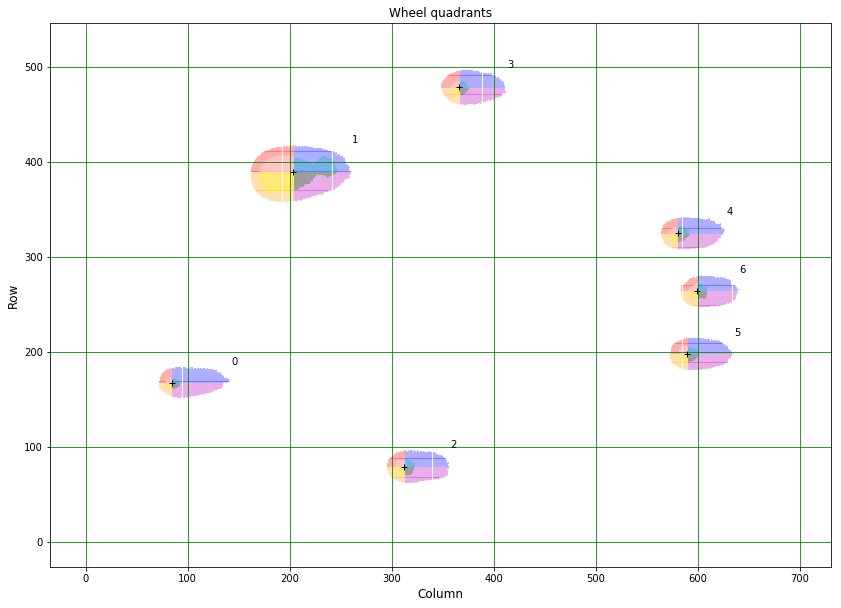

 
Date and time 2021-05-05 13:25:51.957077
Time since last check is 0:00:00.559255


In [9]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
debug = False
#
withLabels = True
#
print(" ")
print("Number of wheels",nWheels)
#
pnts_num_UL = np.zeros(nClus).astype(int)
pnts_row_UL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
pnts_col_UL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
pnts_num_UR = np.zeros(nClus).astype(int)
pnts_row_UR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
pnts_col_UR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
pnts_num_LL = np.zeros(nClus).astype(int)
pnts_row_LL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
pnts_col_LL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
pnts_num_LR = np.zeros(nClus).astype(int)
pnts_row_LR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
pnts_col_LR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num_UL = np.zeros(nClus).astype(int)
head_row_UL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
head_col_UL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num_UR = np.zeros(nClus).astype(int)
head_row_UR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
head_col_UR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num_LL = np.zeros(nClus).astype(int)
head_row_LL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
head_col_LL = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num_LR = np.zeros(nClus).astype(int)
head_row_LR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
head_col_LR = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
sumULwheel = np.zeros(nWheels)
sumURwheel = np.zeros(nWheels)
sumLLwheel = np.zeros(nWheels)
sumLRwheel = np.zeros(nWheels)
#
sumULhead = np.zeros(nWheels)
sumURhead = np.zeros(nWheels)
sumLLhead = np.zeros(nWheels)
sumLRhead = np.zeros(nWheels)
#
# Text positions
wTextRow = 2
wTextCol = 2
hTextRow = 28
hTextCol = 28
#
fig = plt.figure(figsize=(14, 10))
plt.title("Wheel quadrants", fontsize = 12)
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
#
nCol = 0
for nW in range(0, nWheels):
    #
    # Wheels
    colHere = pnts_col[nW, 0:pnts_num[nW]]
    rowHere = pnts_row[nW, 0:pnts_num[nW]]
    #
    boolUL = np.logical_and(colHere < avgHeadCol[nW], rowHere > avgHeadRow[nW]) 
    pnts_num_UL[nW] = np.sum(boolUL)
    pnts_row_UL[nW, 0:pnts_num_UL[nW]] = rowHere[boolUL]
    pnts_col_UL[nW, 0:pnts_num_UL[nW]] = colHere[boolUL]
    #
    boolUR = np.logical_and(colHere > avgHeadCol[nW], rowHere > avgHeadRow[nW]) 
    pnts_num_UR[nW] = np.sum(boolUR)
    pnts_row_UR[nW, 0:pnts_num_UR[nW]] = rowHere[boolUR]
    pnts_col_UR[nW, 0:pnts_num_UR[nW]] = colHere[boolUR]
    #
    boolLL = np.logical_and(colHere < avgHeadCol[nW], rowHere < avgHeadRow[nW])
    pnts_num_LL[nW] = np.sum(boolLL)
    pnts_row_LL[nW, 0:pnts_num_LL[nW]] = rowHere[boolLL]
    pnts_col_LL[nW, 0:pnts_num_LL[nW]] = colHere[boolLL]
    #
    boolLR = np.logical_and(colHere > avgHeadCol[nW], rowHere < avgHeadRow[nW]) 
    pnts_num_LR[nW] = np.sum(boolLR)
    pnts_row_LR[nW, 0:pnts_num_LR[nW]] = rowHere[boolLR]
    pnts_col_LR[nW, 0:pnts_num_LR[nW]] = colHere[boolLR]
    #
    # Heads
    colHere = head_col[nW, 0:head_num[nW]]
    rowHere = head_row[nW, 0:head_num[nW]]
    #
    boolUL = np.logical_and(colHere < avgHeadCol[nW], rowHere > avgHeadRow[nW])
    head_num_UL[nW] = np.sum(boolUL)
    head_row_UL[nW, 0:head_num_UL[nW]] = rowHere[boolUL]
    head_col_UL[nW, 0:head_num_UL[nW]] = colHere[boolUL]
    #
    boolUR = np.logical_and(colHere > avgHeadCol[nW], rowHere > avgHeadRow[nW])
    head_num_UR[nW] = np.sum(boolUR)
    head_row_UR[nW, 0:head_num_UR[nW]] = rowHere[boolUR]
    head_col_UR[nW, 0:head_num_UR[nW]] = colHere[boolUR]
    #
    boolLL = np.logical_and(colHere < avgHeadCol[nW], rowHere < avgHeadRow[nW]) 
    head_num_LL[nW] = np.sum(boolLL)
    head_row_LL[nW, 0:head_num_LL[nW]] = rowHere[boolLL]
    head_col_LL[nW, 0:head_num_LL[nW]] = colHere[boolLL]
    #
    boolLR = np.logical_and(colHere > avgHeadCol[nW], rowHere < avgHeadRow[nW]) 
    head_num_LR[nW] = np.sum(boolLR)
    head_row_LR[nW, 0:head_num_LR[nW]] = rowHere[boolLR]
    head_col_LR[nW, 0:head_num_LR[nW]] = colHere[boolLR]
    #
    sumULwheel[nW] = np.sum(imgGrey[pnts_row_UL[nW, 0:pnts_num_UL[nW]], pnts_col_UL[nW, 0:pnts_num_UL[nW]]])
    sumURwheel[nW] = np.sum(imgGrey[pnts_row_UR[nW, 0:pnts_num_UR[nW]], pnts_col_UR[nW, 0:pnts_num_UR[nW]]])
    sumLLwheel[nW] = np.sum(imgGrey[pnts_row_LL[nW, 0:pnts_num_LL[nW]], pnts_col_LL[nW, 0:pnts_num_LL[nW]]])
    sumLRwheel[nW] = np.sum(imgGrey[pnts_row_LR[nW, 0:pnts_num_LR[nW]], pnts_col_LR[nW, 0:pnts_num_LR[nW]]])
    #
    sumULhead[nW] = np.sum(imgGrey[head_row_UL[nW, 0:head_num_UL[nW]], head_col_UL[nW, 0:head_num_UL[nW]]])
    sumURhead[nW] = np.sum(imgGrey[head_row_UR[nW, 0:head_num_UR[nW]], head_col_UR[nW, 0:head_num_UR[nW]]])
    sumLLhead[nW] = np.sum(imgGrey[head_row_LL[nW, 0:head_num_LL[nW]], head_col_LL[nW, 0:head_num_LL[nW]]])
    sumLRhead[nW] = np.sum(imgGrey[head_row_LR[nW, 0:head_num_LR[nW]], head_col_LR[nW, 0:head_num_LR[nW]]])
    #
    # Wheels
    size = 0.01
    plt.scatter(pnts_col_UL[nW, 0:pnts_num_UL[nW]], pnts_row_UL[nW, 0:pnts_num_UL[nW]], 
                s = size, color = 'r')
    plt.scatter(pnts_col_UR[nW, 0:pnts_num_UR[nW]], pnts_row_UR[nW, 0:pnts_num_UR[nW]], 
                s = size, color = 'b')
    plt.scatter(pnts_col_LL[nW, 0:pnts_num_LL[nW]], pnts_row_LL[nW, 0:pnts_num_LL[nW]], 
                s = size, color = 'orange')
    plt.scatter(pnts_col_LR[nW, 0:pnts_num_LR[nW]], pnts_row_LR[nW, 0:pnts_num_LR[nW]], 
                s = size, color = 'm')
    #
    # Heads
    plt.scatter(head_col_UL[nW, 0:head_num_UL[nW]], head_row_UL[nW, 0:head_num_UL[nW]], 
                s = size, color = 'w')
    plt.scatter(head_col_UR[nW, 0:head_num_UR[nW]], head_row_UR[nW, 0:head_num_UR[nW]], 
                s = size, color = 'c')
    plt.scatter(head_col_LL[nW, 0:head_num_LL[nW]], head_row_LL[nW, 0:head_num_LL[nW]], 
                s = size, color = 'yellow')
    plt.scatter(head_col_LR[nW, 0:head_num_LR[nW]], head_row_LR[nW, 0:head_num_LR[nW]], 
                s = size, color = 'g')
    #
    if withLabels:
        row_label = np.amax(pnts_row[nW, :]) + wTextRow
        col_label = np.amax(pnts_col[nW, :]) + wTextCol
        plt.text(col_label, row_label, str(nW), color = 'k')
    #
#
sumLeftTail = sumULwheel + sumLLwheel - sumULhead - sumLLhead
sumRightTail = sumURwheel + sumLRwheel - sumURhead - sumLRhead
sumUpperTail = sumULwheel + sumURwheel - sumULhead - sumURhead
sumLowerTail = sumLLwheel + sumLRwheel - sumLLhead - sumLRhead
if debug:
    print(" ")
    print("sumLeftTail \n",sumLeftTail)
    print("sumRightTail \n",sumRightTail)
print(" ")
print("Left-right asymmetry tail\n",(sumLeftTail - sumRightTail)/(sumLeftTail + sumRightTail))
print("Mean left-right asymmetry",np.mean((sumLeftTail - sumRightTail)/(sumLeftTail + sumRightTail)))
print(" ")
print("Up-down asymmetry tail\n",(sumUpperTail - sumRightTail)/(sumLeftTail + sumRightTail))
print("Mean up-down asymmetry",np.mean((sumUpperTail - sumLowerTail)/(sumUpperTail + sumLowerTail)))
print(" ")
print("Left-right asymmetry head\n",(sumULhead + sumLLhead - sumURhead - sumLRhead)/(sumULhead + sumLLhead + sumURhead + sumLRhead))
print("Mean left-right asymmetry",np.mean((sumULhead + sumLLhead - sumURhead - sumLRhead)/
                                          (sumULhead + sumLLhead + sumURhead + sumLRhead)))
print("Up-down asymmetry head\n",(sumULhead + sumURhead - sumLLhead - sumLRhead)/(sumULhead + sumURhead + sumLLhead + sumLRhead))
print("Mean up-down asymmetry",np.mean((sumULhead + sumURhead - sumLLhead - sumLRhead)/
                                          (sumULhead + sumURhead + sumLLhead + sumLRhead)))
#
plt.plot(avgHeadCol, avgHeadRow, marker = '+', linestyle = '', color = 'k')
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))